
### 4
Generate N = 100 points from Gaussian distribution with mean 2 and standard deviation 2(those values are the ground truth).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma, N = 2, 2, 100
D = np.random.normal(mu, sigma, N)

**a.** Plot a histogram of D. What is the mean and standard deviation on this sample?

Mean = 2.00, standard deviation = 1.85


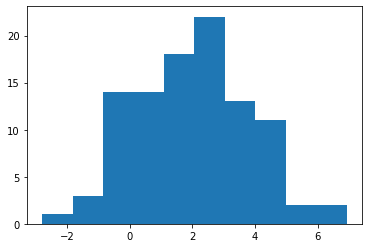

In [7]:
plt.hist(D)
print("Mean = {:.2f}, standard deviation = {:.2f}".format(D.mean(), D.std()))

**b.** Calculate the log-likelihood $P[D|\mu,\sigma]$ given 
(i) $\mu = 1$, $\sigma=2$, 
(ii)$\mu = 1.5$, $\sigma = 2$
(iii) $\mu = 2$, $\sigma = 2$.
Which of those results in the highest log-likelihood?


In [9]:
def log_likelihood(D, mu, sigma):
    ret = 0
    for x in D:
        ret = ret + np.log(1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2)))
    return ret
params = [(1, 2), (1.5, 2), (2, 2)]
P = [log_likelihood(D, mu, sigma) for mu, sigma in params]
for (mu, sigma), p in zip(params, P):
    print("log-likelihood(\u03BB = {:.2f}, \u03C3 = {:.2f}|D) = {:.2f}".format(mu, sigma, p))
maxIdx = P.index(max(P))
print("\u03BB = {:.2f} and \u03C3 = {:.2f} result in the highest log-likelihood.".format(*params[maxIdx]))

log-likelihood(λ = 1.00, σ = 2.00|D) = -216.42
log-likelihood(λ = 1.50, σ = 2.00|D) = -207.10
log-likelihood(λ = 2.00, σ = 2.00|D) = -204.03
λ = 2.00 and σ = 2.00 result in the highest log-likelyhood.


**c.** Find the maximum likelihood estimation of $\mu,\sigma$. How does this compareto the true parameters?

In [10]:
def maximum_likelihood(D):
    mu = np.mean(D)
    sigma = np.sqrt(np.dot(D - mu, (D - mu).T) / D.size)
    return (mu, sigma)
print("Estimated \u03BB = {:.2f}, estimated \u03C3 = {:.2f}.".format(*maximum_likelihood(D)))

estimated λ = 2.00, estimated σ = 1.85.


$\lambda$ is the same the the true parameter while $\sigma$ is 0.15 smaller than the ground truth.

**d.** Repeat the following procedure 200 times: 

(1) generate N = 100 points Gaussian distribution with mean 2 and standard deviation 2; 

(2) find the maximum likelihood estimates of μ,σ. 

Plot the histogram of those 50 outcomes. What is the average of the estimates over 50 experiments? Now, repeat the same procedure, but generate N = points in each iteration. How do the results change? What is the explanation for this (you can search the Web to answer)?


**The value for the second N is missing, I will use 1000. And I suppose the number 50 in `50 outcomes` is a typo, and 200 should be used here.**

In [15]:
def exp4d(N, repeat, mu, sigma):
    MuSigmaEstimation = [maximum_likelihood(np.random.normal(mu, sigma, N)) for _ in range(repeat)]
    Mu, Sigma = ([x[0] for x in MuSigmaEstimation], [x[1] for x in MuSigmaEstimation])
    print("The average estimation of \u03BB = {:.2f}, the average estimation of \u03C3 = {:.2f}.".format(np.mean(Mu), np.mean(Sigma)))
    return (Mu, Sigma)

For **N = 100**:

The average estimation of λ = 2.00, the average estimation of σ = 1.99.


Text(0.5, 1.0, 'Histogram of $\\sigma$')

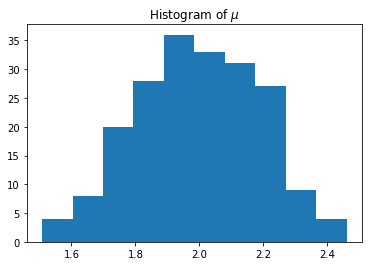

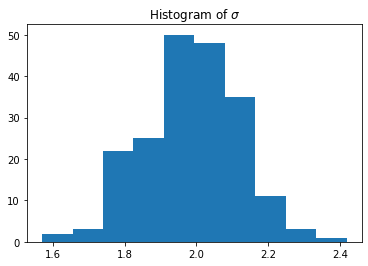

In [17]:
Mu, Sigma = exp4d(100, 200, 2, 2)
plt.figure()
plt.hist(Mu)
plt.title("Histogram of $\mu$")
plt.figure()
plt.hist(Sigma)
plt.title("Histogram of $\sigma$")

For **N = 1000***:

The average estimation of λ = 2.00, the average estimation of σ = 2.00.


Text(0.5, 1.0, 'Histogram of $\\sigma$')

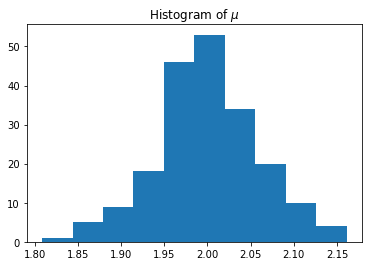

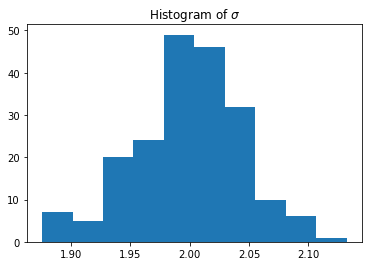

In [18]:
Mu, Sigma = exp4d(1000, 200, 2, 2)
plt.figure()
plt.hist(Mu)
plt.title("Histogram of $\mu$")
plt.figure()
plt.hist(Sigma)
plt.title("Histogram of $\sigma$")

Comparing the experiment results for **N = 100** and **N = 1000**, the distribution of estimated $\mu$ and $\sigma$ are much closer to the ground truth when **N = 1000**. This is because when there are more samples, the maximum log-likelihood method can get more accurate estimation each time.